# Project_4, Group_15

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

## Part 1

### 1.1. import dataset

In [2]:
# Read the CSV file into a DataFrame and display the first three rows
df = pd.read_csv("cleveland.csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


### 1.2. rename

In [3]:
# Rename the 'num' column to 'disease'
df = df.rename(columns={"num": "disease"})

# Apply a lambda function to set 'disease' values to 1 if greater than 1
df["disease"] = df["disease"].apply(lambda x: min(x, 1))

# Replace any "?" values with pandas NA and drop rows with missing values
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)

# Display the first three rows of the cleaned DataFrame
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


### 1.3. Standardize selected columns using z-score normalization

In [4]:
# Standardize selected columns using z-score normalization
columns_to_standardize = [
    "thalach", "exang", "oldpeak", "ca", "thal", "age", 
    "sex", "cp", "trestbps", "chol", "fbs", "restecg", "slope"
]

# Convert "ca" and "thal" columns to float type before standardizing
df["ca"] = df["ca"].astype("float")
df["thal"] = df["thal"].astype("float")

# Apply standardization to each column
for col in columns_to_standardize:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

df.head(3)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,0.934603,0.68993,-2.236854,0.749116,-0.275978,2.426332,1.008496,0.017465,-0.695246,1.067164,2.260330,-0.720760,0.654772,0
1,1.376605,0.68993,0.872408,1.593577,0.743301,-0.410757,1.008496,-1.813274,1.433497,0.381130,0.642696,2.474249,-0.892713,1
2,1.376605,0.68993,0.872408,-0.658320,-0.352904,-0.410757,1.008496,-0.897904,1.433497,1.324427,0.642696,1.409246,1.170601,1


### 1.4. Plotting correlation plot to see which features have a great slope value

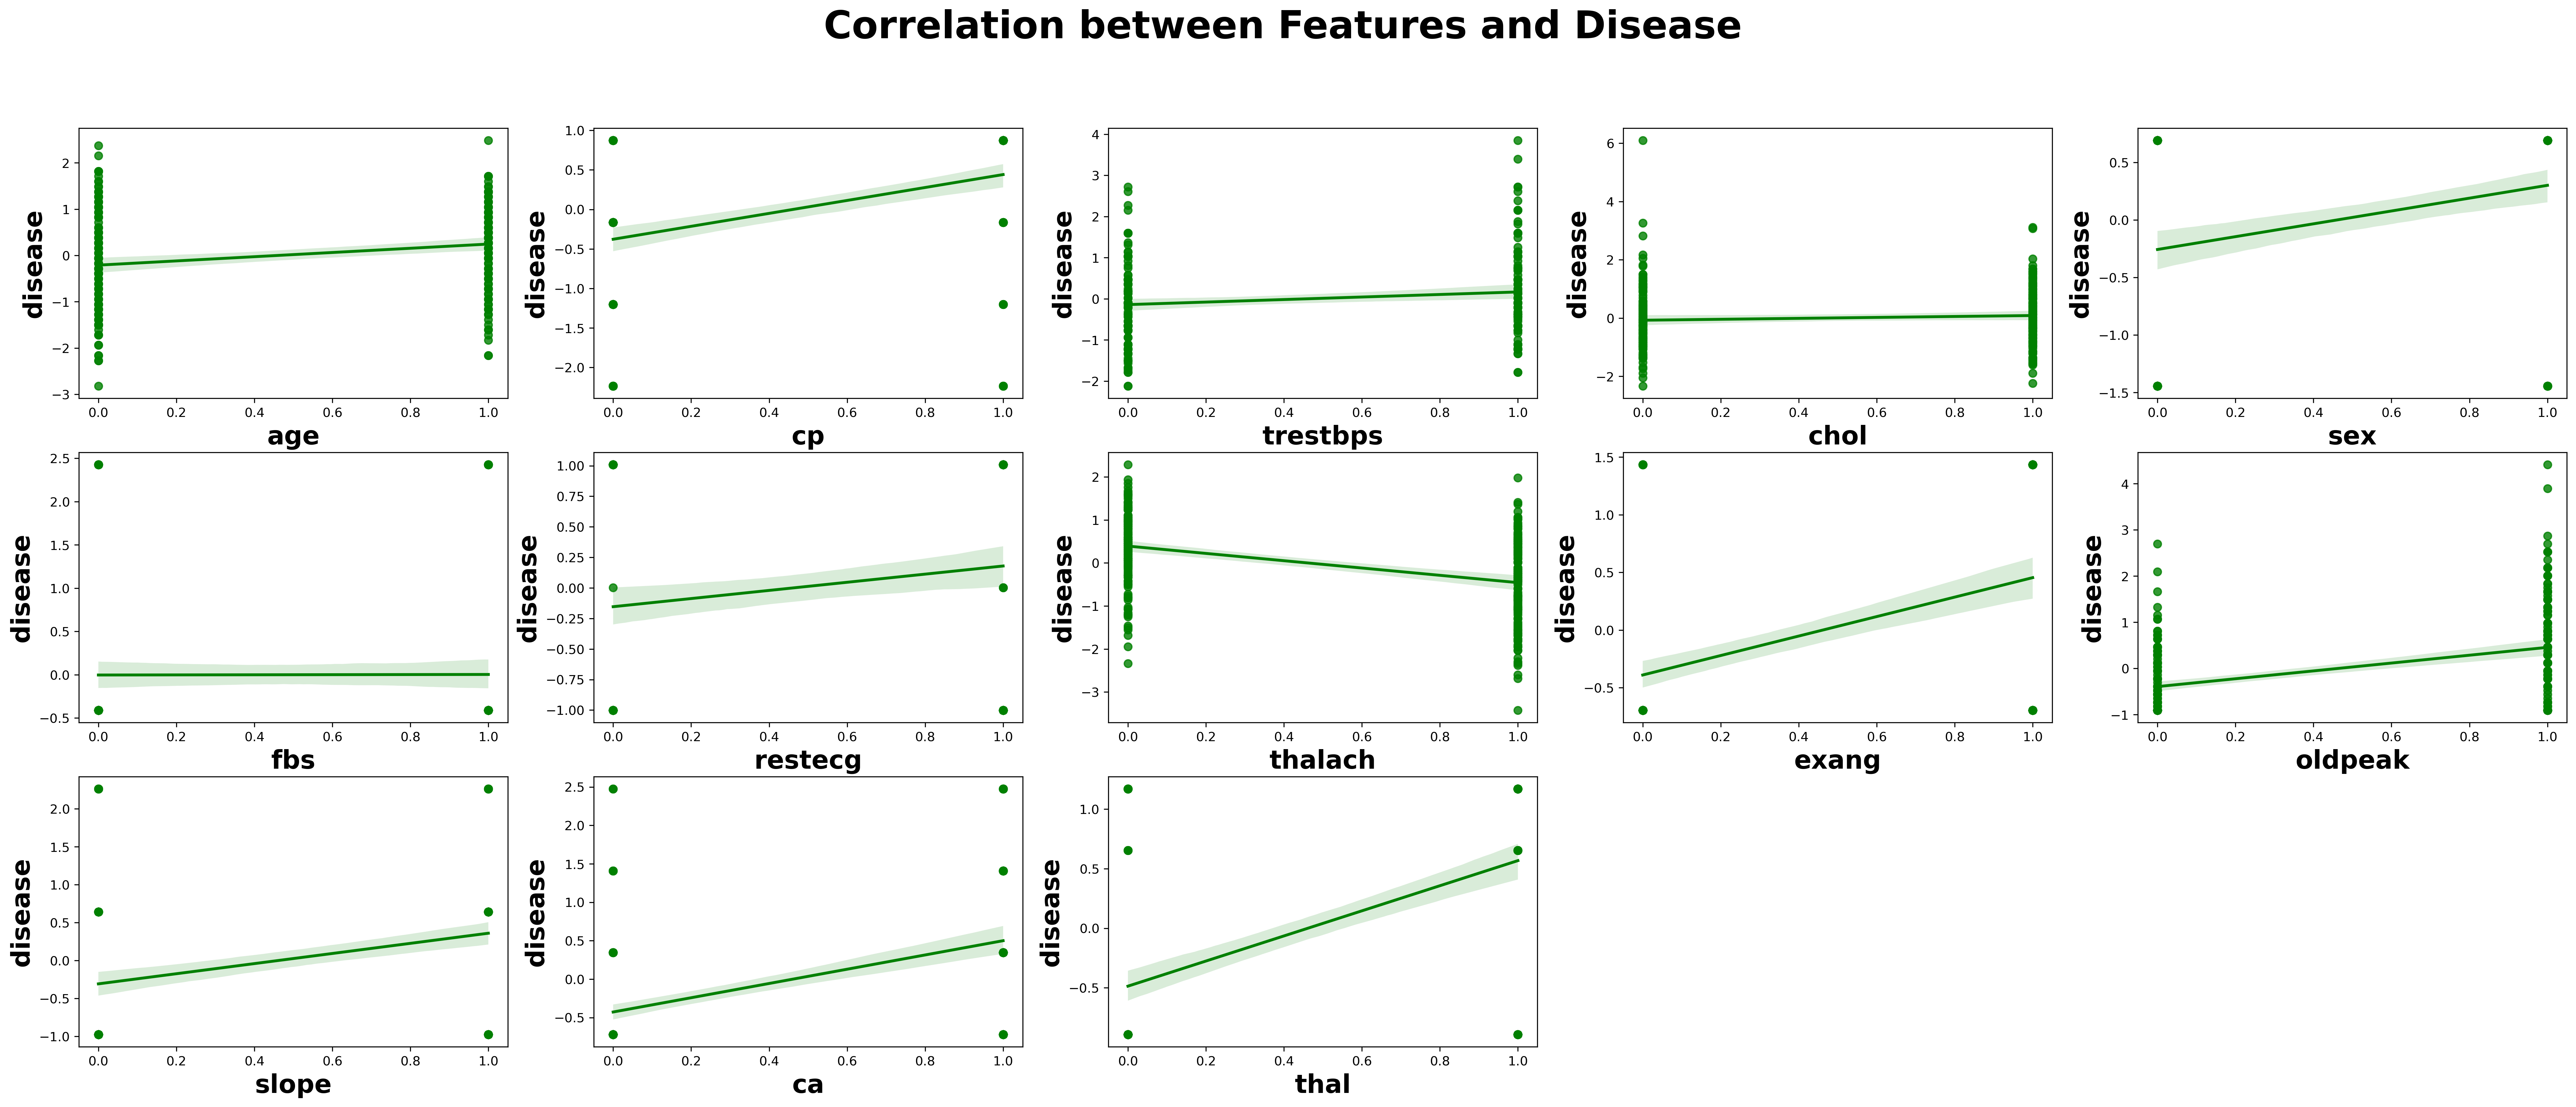

In [5]:
# Create a figure with subplots (3 rows and 5 columns)
fig, axes = plt.subplots(3, 5, figsize=(35, 13), sharex=False, dpi=300)

# Set the main title for the figure with larger font size and bold style
fig.suptitle('Correlation between Features and Disease', fontsize=30, fontweight='bold')

# Define a list of columns to plot
columns = ['age', 'cp', 'trestbps', 'chol', 'sex', 'fbs', 'restecg', 
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Loop through columns and plot each with a regression plot
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 5)  # Calculate row and column index for subplot
    sns.regplot(x='disease', y=col, data=df, ax=axes[row, col_idx], color='green')  # Change color to green
    axes[row, col_idx].set_xlabel(col, fontsize=20, fontweight='bold')  # Set x label to bold
    axes[row, col_idx].set_ylabel("disease", fontsize=20, fontweight='bold')  # Set y label to bold

# Remove extra subplots that aren't used
fig.delaxes(axes[2, 3])
fig.delaxes(axes[2, 4])

# Show the plot
plt.show()


### 1.5. Finding the best features based by correlation results

In [6]:
# Separate features and class label from the DataFrame
features = df.iloc[:, :-1]
class_label = df.iloc[:, -1]

# Calculate and store slopes between each feature and the class label
slopes = {feature: np.polyfit(feature_data, class_label, 1)[0] for feature, feature_data in features.items()}

# Sort slopes in descending order and print
slopes_sorted = dict(sorted(slopes.items(), key=lambda x: x[1], reverse=True))
print(slopes_sorted)


{'thal': 0.26297210769735474, 'ca': 0.23128852165152397, 'oldpeak': 0.21174607491232483, 'exang': 0.21039957201920906, 'cp': 0.20420236357378693, 'slope': 0.16630467984236108, 'sex': 0.1390495083714038, 'age': 0.11338766537367442, 'restecg': 0.08306192635676878, 'trestbps': 0.07664368080749008, 'chol': 0.04008937258076862, 'fbs': 0.0015813241871587137, 'thalach': -0.21162873378491032}



Based on the charts the features: thalach, exang, oldpeak, ca, and thal have the biggest abstract correlation slope value. 

### 1.6. Distribution of the features over class label

/Users/ehsankahrizi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ehsankahrizi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ehsankahrizi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ehsankahrizi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

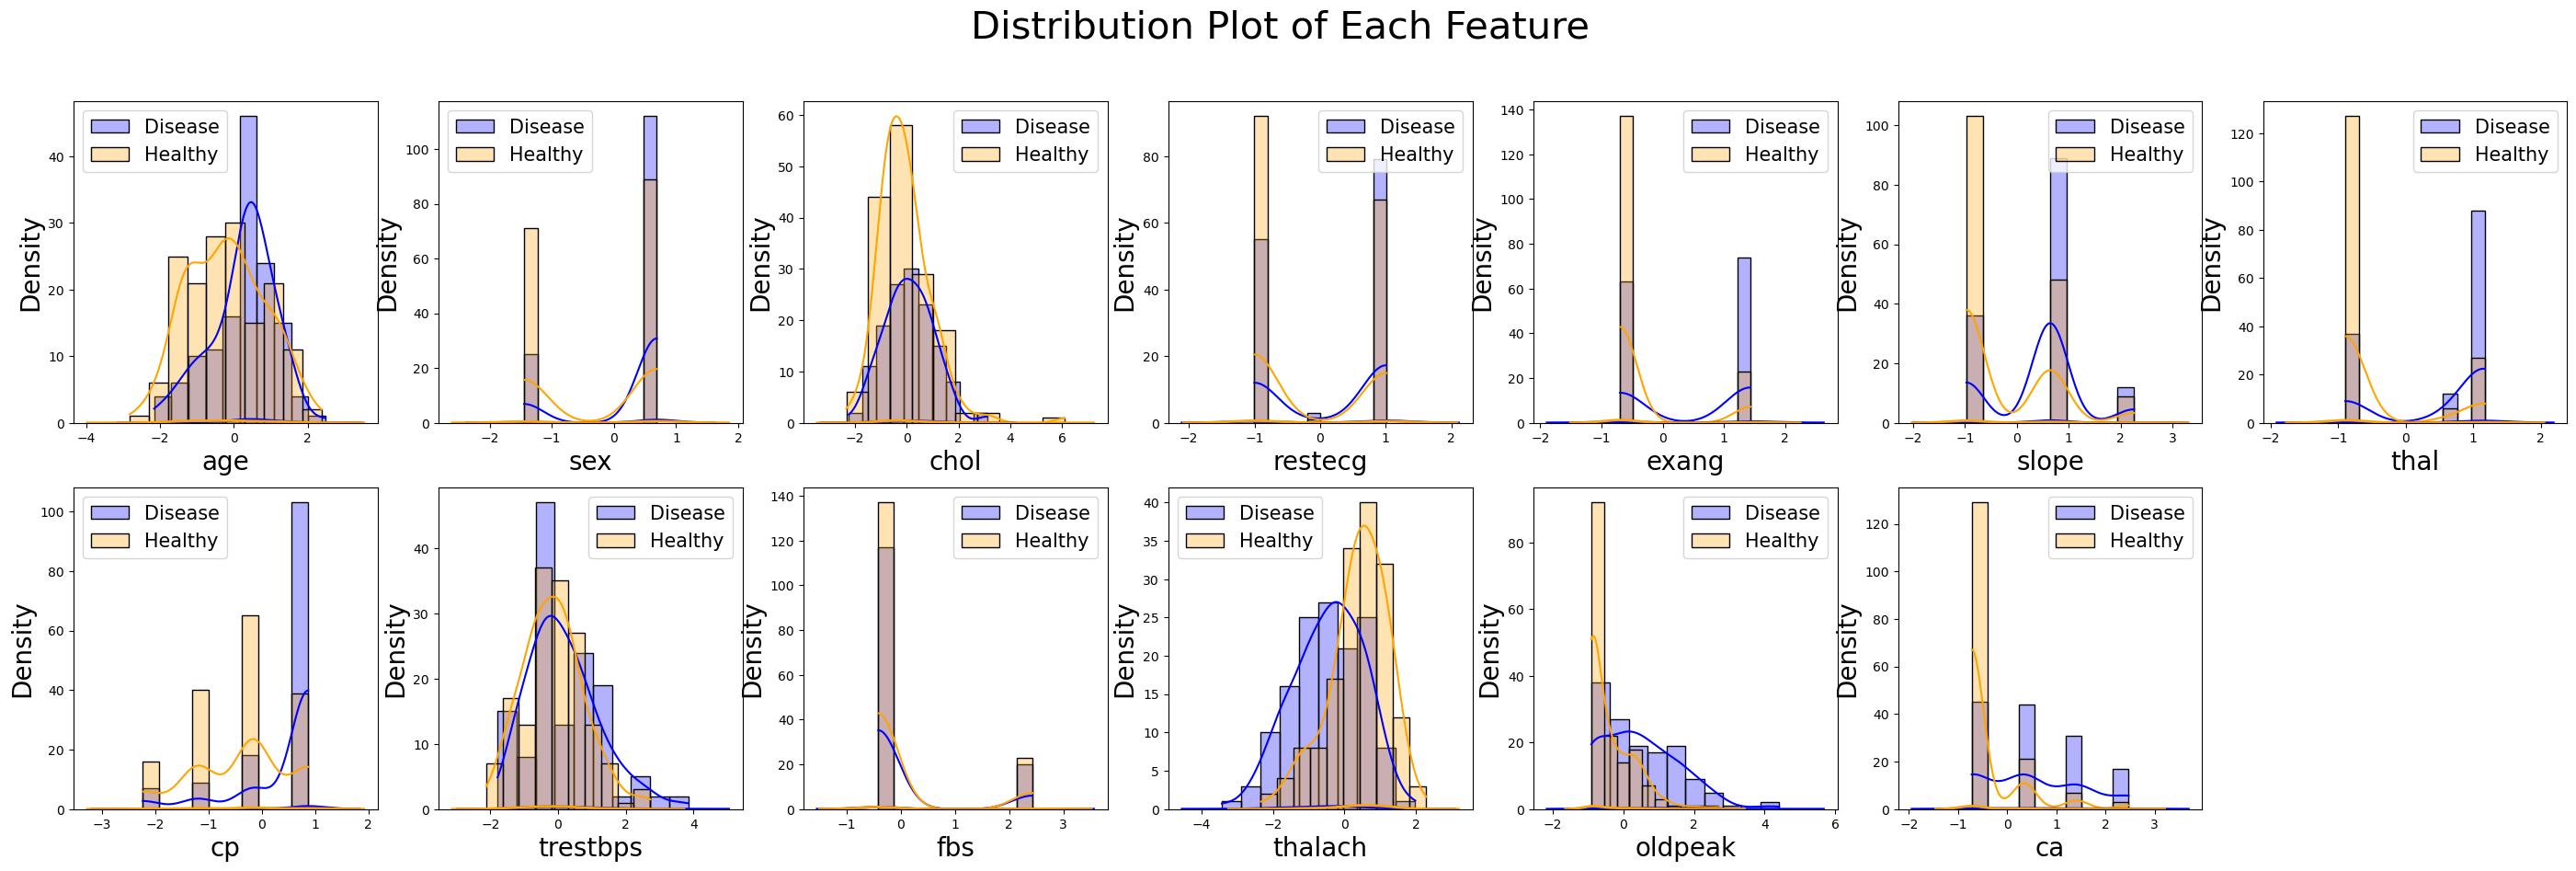

In [7]:

# Separate the data into disease and no disease groups
disease_1 = df[df.disease == 1]
disease_0 = df[df.disease == 0]

# Create a figure with subplots (2 rows and 7 columns)
figs, axes = plt.subplots(2, 7, figsize=(35, 10), sharex=False)
figs.suptitle('Distribution Plot of Each Feature', fontsize=30)

# Define a list of features to plot
features = ['age', 'sex', 'chol', 'restecg', 'exang', 'slope', 'thal',
            'cp', 'trestbps', 'fbs', 'thalach', 'oldpeak', 'ca']

# Loop through features and create density plots for each feature
for i, feature in enumerate(features):
    row, col = divmod(i, 7)  # Calculate row and column index
    # Plot histograms with KDE for both disease and healthy groups
    sns.histplot(disease_1[feature], label='Disease', kde=True, ax=axes[row, col], bins=10, color='blue', alpha=0.3)
    sns.histplot(disease_0[feature], label='Healthy', kde=True, ax=axes[row, col], bins=10, color='orange', alpha=0.3)
    sns.kdeplot(disease_1[feature], ax=axes[row, col], color='blue', lw=2)
    sns.kdeplot(disease_0[feature], ax=axes[row, col], color='orange', lw=2)
    
    # Set axis labels and legend
    axes[row, col].set_xlabel(feature, fontsize=20)
    axes[row, col].set_ylabel("Density", fontsize=20)
    axes[row, col].legend(fontsize=15)


# Remove the extra subplot
figs.delaxes(axes[1, 6])

# Display the plots
plt.show()


### 1.7. Calculated T-test to see the different groups {0, 1} per each feature


In [8]:
from scipy.stats import ttest_ind
significant_results = {}

for feature in df.columns[:-1]: 
    t_statistic, p_value = ttest_ind(disease_1[feature], disease_0[feature])
    
    
    if p_value < 0.05:
        # Store the t-statistic and p-value in the dictionary
        significant_results[feature] = {'T-Statistic': t_statistic, 'P-Value': p_value}

print(significant_results)

{'age': {'T-Statistic': 4.004759233496146, 'P-Value': 7.862867945608057e-05}, 'sex': {'T-Statistic': 4.979793919838175, 'P-Value': 1.085075745016727e-06}, 'cp': {'T-Statistic': 7.696876943092243, 'P-Value': 2.1134928777039958e-13}, 'trestbps': {'T-Statistic': 2.66789175704828, 'P-Value': 0.008054796358875009}, 'restecg': {'T-Statistic': 2.8974103310245902, 'P-Value': 0.004044406128535445}, 'thalach': {'T-Statistic': -8.03678136687634, 'P-Value': 2.2397153233936963e-14}, 'exang': {'T-Statistic': 7.979990811272847, 'P-Value': 3.272489572994005e-14}, 'oldpeak': {'T-Statistic': 8.042214149140527, 'P-Value': 2.1597372771142342e-14}, 'slope': {'T-Statistic': 6.06665475761738, 'P-Value': 3.9974247520996035e-09}, 'ca': {'T-Statistic': 8.976517469542992, 'P-Value': 3.358946851269956e-17}, 'thal': {'T-Statistic': 10.640456719227613, 'P-Value': 1.3594560319516495e-22}}


### 1.8 Selecting our features for further analysis

In [9]:
# Extract feature arrays for the initial and final sets of features
X_first_time = df.loc[:, ['thalach', 'oldpeak', 'ca', 'thal']].values
X = df.loc[:, ['thalach', 'exang', 'oldpeak', 'ca', 'thal']].values

# Extract target variable array
y = df['disease'].values


## 1.9. k-nearest neighbors function

In [10]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def knn(n_neighbors, X_train, y_train, X_test, y_test):
    # Initialize the Nearest Neighbors model with specified parameters
    nn_model = NearestNeighbors(n_neighbors=n_neighbors, metric="euclidean", algorithm="auto")
    
    # Fit the model on the training data
    nn_model.fit(X_train)
    
    # Find the nearest neighbors for the test data
    distances, indices = nn_model.kneighbors(X_test)
    
    # Predict labels for the test data
    y_pred = []
    for i in range(len(X_test)):
        # Count the number of 0's and 1's in the neighbors' labels
        zero_count = list(y_train[indices[i]]).count(0)
        one_count = list(y_train[indices[i]]).count(1)
        
        # Predict 1 if there are equal or more 1's; otherwise, predict 0
        if one_count >= zero_count:
            y_pred.append(1)
        else:
            y_pred.append(0)
    
    # Calculate precision, recall, f-score, support, and accuracy
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])
    accuracy = accuracy_score(y_test, y_pred)
    
    return [precision, recall, fscore, support, accuracy]

    

## 1.10. Finding the best K

best_k without average 36


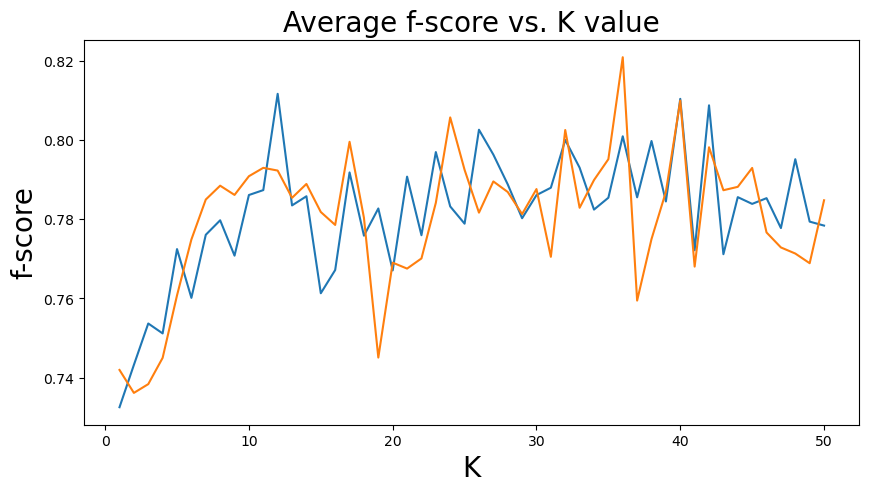

Average best K: 24


/Users/ehsankahrizi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(9.444444444444445, 0.5, 'Count')

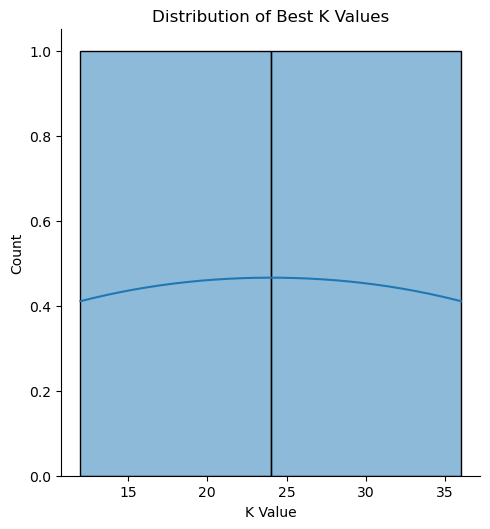

In [11]:
# For a given value of k, use a 10-fold cross validation to compute an average f-score
def averageFScore(kValue, X, y):
    
    k_fold = 10

    # Calculate the number of samples per fold
    fold_size = len(X) // k_fold
    
    # Shuffle the dataset
    X = np.array(X)
    y = np.array(y)

    # Shuffle the indices array
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Use the shuffled indices to shuffle both X and y
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    f_score_1 = []
    

    for fold in range(k_fold):
        # Split the dataset into training and testing sets for this fold
        test_start = fold * fold_size
        test_end = (fold + 1) * fold_size
        X_test_fold = X_shuffled[test_start:test_end]
        y_test_fold = y_shuffled[test_start:test_end]


        # Use the remaining data as training set
        X_train_fold = np.concatenate([X_shuffled[:test_start], X_shuffled[test_end:]])
        y_train_fold = np.concatenate([y_shuffled[:test_start], y_shuffled[test_end:]])
        result = knn(kValue, X_train_fold, y_train_fold, X_test_fold, y_test_fold)
        # print(result)
        f_score_1.append(result[2][1])
    
    return np.mean(f_score_1)

k_range = range(1, 51)
best_Ks = []
plt.figure(figsize=(10, 5))
# Find 3 best k values, take average
for i in range(2):
    # For k-values 1-50, compute an average f-score and take the k with the highest average f-score
    f_scores = [averageFScore(kValue, X, y) for kValue in k_range]
    best_Ks.append(f_scores.index(max(f_scores))+1)
    plt.plot(k_range,f_scores)
print(f"best_k without average {max(best_Ks)}")
# best_Ksss = best_Ks
f_scores = f_scores
best_K = np.average(best_Ks)

plt.title("Average f-score vs. K value", fontsize=20)
plt.xlabel("K", fontsize=20)
plt.ylabel("f-score", fontsize=20)
plt.show()

best_K = int(best_K)
print(f"Average best K: {best_K}")
sns.displot(data=best_Ks,kde=True)
plt.title("Distribution of Best K Values")
plt.xlabel("K Value")
plt.ylabel("Count")

In the file `FindBestK.py`, there is code which runs a 10-fold cross-validation 1000 times. We will use the best k found by that code.

In [12]:
# From the results of multiple running, set best_K to 32
best_K = 32

### 1.11. For the top 4 selected features

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_first_time, y, test_size=.2)
result = knn(best_K, X_train, y_train, X_test, y_test)
print(f'precision={result[0]}, recall={result[1]}, f-score={result[2]}, support={result[3]}') 
print(f'accuracy={result[4]}') 


precision=[0.89655172 0.70967742], recall=[0.74285714 0.88      ], f-score=[0.8125     0.78571429], support=[35 25]
accuracy=0.8


### 1.12. For the top 5 selected features

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
result = knn(best_K, X_train, y_train, X_test, y_test)
print(f'precision={result[0]}, recall={result[1]}, f-score={result[2]}, support={result[3]}') 
print(f'accuracy={result[4]}') 


precision=[0.7 0.9], recall=[0.93333333 0.6       ], f-score=[0.8  0.72], support=[30 30]
accuracy=0.7666666666666667


### 1.13. Using 10-fold Cross Validation for Evaluation of Model with Best K

In [15]:
k_fold = 10

# Calculate the number of samples per fold
fold_size = len(X) // k_fold

# Shuffle the dataset
X = np.array(X)
y = np.array(y)

# Shuffle the indices array
indices = np.arange(len(X))
np.random.shuffle(indices)

# Use the shuffled indices to shuffle both X and y
X_shuffled = X[indices]
y_shuffled = y[indices]

precision_0 = []
precision_1 = []
recall_0 = []
recall_1 = []
f_score_0 = []
f_score_1 = []
support_0 = []
support_1 = []
accuracy = []

for fold in range(k_fold):
    # Split the dataset into training and testing sets for this fold
    test_start = fold * fold_size
    test_end = (fold + 1) * fold_size
    X_test_fold = X_shuffled[test_start:test_end]
    y_test_fold = y_shuffled[test_start:test_end]
    
    
    # Use the remaining data as training set
    X_train_fold = np.concatenate([X_shuffled[:test_start], X_shuffled[test_end:]])
    y_train_fold = np.concatenate([y_shuffled[:test_start], y_shuffled[test_end:]])
    result = knn(best_K, X_train_fold, y_train_fold, X_test_fold, y_test_fold)
    # print(result)
    precision_0.append(result[0][0])
    precision_1.append(result[0][1])
    recall_0.append(result[1][0])
    recall_1.append(result[1][1])
    f_score_0.append(result[2][0])
    f_score_1.append(result[2][1])
    support_0.append(result[3][0])
    support_1.append(result[3][1])
    accuracy.append(result[4])
print("--- Recall ---")
print(f"recall_0 -> {(recall_0)}")
print(f"mean recall_0 -> {np.mean(recall_0)}")
print(f"recall_1 -> {(recall_1)}")
print(f"mean recall_1 -> {np.mean(recall_1)}")
print("\n--- Precision ---")
print(f"precision_0 -> {(precision_0)}")
print(f"mean precision_0 -> {np.mean(precision_0)}")
print(f"precision_1 -> {(precision_1)}")
print(f"mean precision_1 -> {np.mean(precision_1)}")
print("\n--- F-Score ---")
print(f"f-score_0 -> {(f_score_0)}")
print(f"mean f-score_0 -> {np.mean(f_score_0)}")
print(f"f-score_1 -> {(f_score_1)}")
print(f"mean f-score_1 -> {np.mean(f_score_1)}")
print(f"\n--- Accuracy ---")
print(f"accuracy for 1 -> {accuracy}")
print(f"mean accuracy for 1 -> {np.mean(accuracy)}")
print("\n--- Support ---")
print(f"support 0 -> {support_0}")
print(f"support 1 -> {support_1}")
    

--- Recall ---
recall_0 -> [0.7222222222222222, 0.9375, 0.9411764705882353, 0.6666666666666666, 1.0, 1.0, 0.7333333333333333, 0.9090909090909091, 0.8333333333333334, 1.0]
mean recall_0 -> 0.8743322935234701
recall_1 -> [0.8181818181818182, 0.7692307692307693, 0.5833333333333334, 0.6428571428571429, 0.7142857142857143, 0.8888888888888888, 0.7142857142857143, 0.6666666666666666, 0.7272727272727273, 0.8888888888888888]
mean recall_1 -> 0.7413891663891665

--- Precision ---
precision_0 -> [0.8666666666666667, 0.8333333333333334, 0.7619047619047619, 0.6666666666666666, 0.7894736842105263, 0.9523809523809523, 0.7333333333333333, 0.625, 0.8333333333333334, 0.8461538461538461]
mean precision_0 -> 0.790824657798342
precision_1 -> [0.6428571428571429, 0.9090909090909091, 0.875, 0.6428571428571429, 1.0, 1.0, 0.7142857142857143, 0.9230769230769231, 0.7272727272727273, 1.0]
mean precision_1 -> 0.843444055944056

--- F-Score ---
f-score_0 -> [0.7878787878787878, 0.8823529411764706, 0.842105263157894

In [16]:
k_fold = 10

# Calculate the number of samples per fold
fold_size = len(X_first_time) // k_fold

# Shuffle the dataset
X_first_time = np.array(X_first_time)
y = np.array(y)

# Shuffle the indices array
indices = np.arange(len(X_first_time))
np.random.shuffle(indices)

# Use the shuffled indices to shuffle both X and y
X_shuffled = X_first_time[indices]
y_shuffled = y[indices]

precision_0 = []
precision_1 = []
recall_0 = []
recall_1 = []
f_score_0 = []
f_score_1 = []
support_0 = []
support_1 = []
accuracy = []

for fold in range(k_fold):
    # Split the dataset into training and testing sets for this fold
    test_start = fold * fold_size
    test_end = (fold + 1) * fold_size
    X_test_fold = X_shuffled[test_start:test_end]
    y_test_fold = y_shuffled[test_start:test_end]
    
    
    # Use the remaining data as training set
    X_train_fold = np.concatenate([X_shuffled[:test_start], X_shuffled[test_end:]])
    y_train_fold = np.concatenate([y_shuffled[:test_start], y_shuffled[test_end:]])
    result = knn(best_K, X_train_fold, y_train_fold, X_test_fold, y_test_fold)
    # print(result)
    precision_0.append(result[0][0])
    precision_1.append(result[0][1])
    recall_0.append(result[1][0])
    recall_1.append(result[1][1])
    f_score_0.append(result[2][0])
    f_score_1.append(result[2][1])
    support_0.append(result[3][0])
    support_1.append(result[3][1])
    accuracy.append(result[4])
print("--- Recall ---")
print(f"recall_0 -> {(recall_0)}")
print(f"mean recall_0 -> {np.mean(recall_0)}")
print(f"recall_1 -> {(recall_1)}")
print(f"mean recall_1 -> {np.mean(recall_1)}")
print("\n--- Precision ---")
print(f"precision_0 -> {(precision_0)}")
print(f"mean precision_0 -> {np.mean(precision_0)}")
print(f"precision_1 -> {(precision_1)}")
print(f"mean precision_1 -> {np.mean(precision_1)}")
print("\n--- F-Score ---")
print(f"f-score_0 -> {(f_score_0)}")
print(f"mean f-score_0 -> {np.mean(f_score_0)}")
print(f"f-score_1 -> {(f_score_1)}")
print(f"mean f-score_1 -> {np.mean(f_score_1)}")
print(f"\n--- Accuracy ---")
print(f"accuracy for 1 -> {accuracy}")
print(f"mean accuracy for 1 -> {np.mean(accuracy)}")
print("\n--- Support ---")
print(f"support 0 -> {support_0}")
print(f"support 1 -> {support_1}")
    

--- Recall ---
recall_0 -> [0.875, 0.7894736842105263, 0.8095238095238095, 0.7142857142857143, 0.8181818181818182, 0.8947368421052632, 0.9333333333333333, 0.8125, 0.8666666666666667, 0.9090909090909091]
mean recall_0 -> 0.842279277739804
recall_1 -> [0.6923076923076923, 1.0, 0.875, 0.8, 0.7777777777777778, 0.9, 0.7142857142857143, 0.7692307692307693, 0.7142857142857143, 0.8333333333333334]
mean recall_1 -> 0.8076221001221002

--- Precision ---
precision_0 -> [0.7777777777777778, 1.0, 0.9444444444444444, 0.7692307692307693, 0.6923076923076923, 0.9444444444444444, 0.7777777777777778, 0.8125, 0.7647058823529411, 0.7692307692307693]
mean precision_0 -> 0.8252419557566617
precision_1 -> [0.8181818181818182, 0.7142857142857143, 0.6363636363636364, 0.75, 0.875, 0.8181818181818182, 0.9090909090909091, 0.7692307692307693, 0.8333333333333334, 0.9375]
mean precision_1 -> 0.8061167998667997

--- F-Score ---
f-score_0 -> [0.8235294117647058, 0.8823529411764706, 0.8717948717948718, 0.740740740740740